<IPython.core.display.Javascript object>


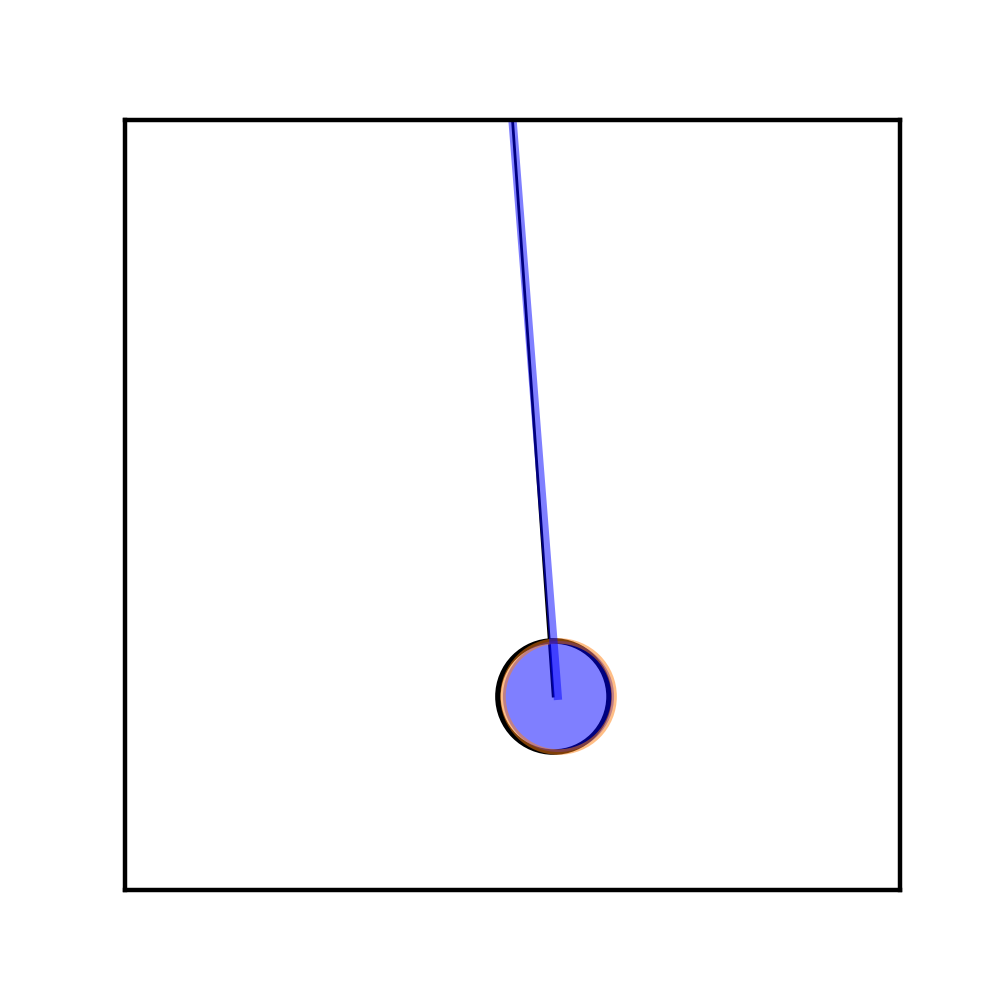

Button(description=u'Swing Pendulum', style=ButtonStyle())

HBox(children=(FloatSlider(value=5.0, description=u'$\\varphi(t=0)$', max=50.0, min=5.0), FloatSlider(value=1.0, description=u'Length', max=1.5, min=0.5)))

HBox(children=(FloatSlider(value=0.0, description=u'$\\delta$', max=0.5, step=0.01), Text(value=u'---', description=u'$\\omega_0$', disabled=True)))

HBox(children=(IntSlider(value=2, description=u'Periods', max=5, min=1), Checkbox(value=False, description=u'Show Large Angle')))

In [38]:
#standard boilerplate for Python
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets
from IPython import display
from scipy.integrate import odeint
import time
np.seterr(divide='ignore', invalid='ignore')

#Parameters
t=0.
dt=0.5
l=1.
g=9.81
yc=1.
omega0=np.sqrt(l/g)
delta=0.

fig = plt.figure(figsize=(2.5, 2.5), dpi=200)
ax = fig.add_subplot(111)
fig.show()
plot_clear()

def plot_clear():
    plt.clf()
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.ylim(-1,1) 
    plt.xlim(-1,1)  
        
def oscillation_small_angle_dgl(yy,t):
    #phidot=dx/dt
    #phiddot=-omega0**2*phi-2*delta*phidot
    global omega0, delta
    phi=yy[0]
    phidot=yy[1]
    return [phidot,-omega0**2*phi-2*delta*phidot]

def oscillation_dgl(yy,t):
    #phidot=dx/dt
    #phiddot=-omega0**2*sin(phi)-2*delta*phidot
    global omega0, delta
    phi=yy[0]
    phidot=yy[1]
    return [phidot,-omega0**2*np.sin(phi)-2*delta*phidot]

def plotall(event):
    global t, dt, l, g, yc, omega0, delta
    phi0=w_phi0.value
    l=w_length.value
    omega0=np.sqrt(l/g)
    delta=w_delta.value
    phi0=phi0*np.pi/180.
    dotphi0=0.
    tend=w_duration.value*2.*np.pi/omega0
    
    #take care of two DGLs to compare with
    phi0_1=phi0
    phi0_2=phi0
    dotphi0_1=dotphi0
    dotphi0_2=dotphi0
    
    s1=[]
    s2=[]
    s1l=[]
    s2l=[]
    
    plot_clear()
    while t<tend:
        #Show large angle dynamics
        if w_view.value:
            #first DGL
            y_1=odeint(oscillation_dgl,[phi0_1, dotphi0_1], np.linspace(t,t+dt,2))
            phi0_1=y_1[-1,0]
            dotphi0_1=y_1[-1,1]
            xpos=l*np.sin(phi0_1)
            ypos=yc-l*np.cos(phi0_1)

            if not s1:
                s1, = plt.plot(xpos,ypos,'o', ms=20, mfc='w', mec='k')
                s1l, = plt.plot([0.,xpos],[yc,ypos],'k',lw=.5)
            else:
                s1.set_xdata(xpos)
                s1.set_ydata(ypos)
                s1l.set_xdata([0.,xpos])
                s1l.set_ydata([yc,ypos])
        
        #second DGL
        y_2=odeint(oscillation_small_angle_dgl,[phi0_2, dotphi0_2], np.linspace(t,t+dt,2))
        phi0_2=y_2[-1,0]
        dotphi0_2=y_2[-1,1]
        xpos=l*np.sin(phi0_2)
        ypos=yc-l*np.cos(phi0_2)
        if not s2:
            s2,=plt.plot(xpos, ypos, 'o', ms=20, mfc='b', alpha=0.5)
            s2l, = plt.plot([0.,xpos],[yc,ypos],'b', alpha=0.5)
        else:
            s2.set_xdata(xpos)
            s2.set_ydata(ypos)
            s2l.set_xdata([0.,xpos])
            s2l.set_ydata([yc,ypos])

        time.sleep(.02)
        t=t+dt
        fig.canvas.draw()
    t=0.
    
def on_omega_change(change):
    global g, omega0
    omega0=np.sqrt(w_length.value/g)
    w_omega0.value="%4.2f"%omega0
    
#interact(update,x0=(0.,1.),phi0=(-3.,3.),omega0=(.5,3.));
w_run = widgets.Button(description='Swing Pendulum')
w_phi0 = widgets.FloatSlider(min=5, max=50., value=1., description = r'$\varphi(t=0)$')
w_length = widgets.FloatSlider(min=.5, max=1.5, value=1., description = r'Length')
w_params = widgets.HBox([w_phi0,w_length])
w_delta = widgets.FloatSlider(min=0., max=0.5, step=0.01, value=0., description = r'$\delta$')
w_omega0 = widgets.Text(value='---' ,description=r'$\omega_0$', disabled=True)
w_params1 = widgets.HBox([w_delta,w_omega0])
w_view = widgets.Checkbox(value=False, description='Show Large Angle')
w_duration = widgets.IntSlider(min=1, max=5, value=2, description = r'Periods')
w_params2 = widgets.HBox([w_duration,w_view])
w_run.on_click(plotall)
display.display(w_run)
display.display(w_params)
display.display(w_params1)
display.display(w_params2)



w_length.observe(on_omega_change, names='value')
on_omega_change(1)